# Regressão 
Teste dois métodos de aprendizagem de máquina para identificar o que apresenta melhores resultados na previsão do volume de tráfego. Avaliem o impacto de usar validação cruzada (com 10 grupos) e split (70% para treinamento e 30% para teste). Para esse último, execute o experimento duas vezes selecionando as instâncias aleatoriamente para o treinamento e teste e avalie o impacto nos resultados.

Outras informações como dia da semana podem ser inclusas.


# Bibliotecas

In [4]:
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import seaborn as sns

from sklearn import preprocessing, neighbors, model_selection, metrics, tree

# Base de Dados

In [6]:
df_base = pd.read_csv('Metro_Interstate_Traffic_Volume.csv',delimiter=',') 
df_base

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


In [7]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
holiday                48204 non-null object
temp                   48204 non-null float64
rain_1h                48204 non-null float64
snow_1h                48204 non-null float64
clouds_all             48204 non-null int64
weather_main           48204 non-null object
weather_description    48204 non-null object
date_time              48204 non-null object
traffic_volume         48204 non-null int64
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


A base de dados possui tanto dados numéricos como dados não numéricos.

# Verificando Base de Dados

## Dados Faltosos

In [8]:
df_base.isnull().sum()

holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
traffic_volume         0
dtype: int64

Não há nenhuma instância nula nos atributos.

## Dados Duplicados

In [9]:
df_base[df_base.duplicated(keep=False)]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
18696,None,286.290,0.0,0.0,1,Clear,sky is clear,2015-09-30 19:00:00,3679
18697,None,286.290,0.0,0.0,1,Clear,sky is clear,2015-09-30 19:00:00,3679
23850,None,289.060,0.0,0.0,90,Clouds,overcast clouds,2016-06-01 10:00:00,4831
23851,None,289.060,0.0,0.0,90,Clouds,overcast clouds,2016-06-01 10:00:00,4831
26783,None,289.775,0.0,0.0,56,Clouds,broken clouds,2016-09-21 15:00:00,5365
26784,None,289.775,0.0,0.0,56,Clouds,broken clouds,2016-09-21 15:00:00,5365
26979,None,287.860,0.0,0.0,0,Clear,Sky is Clear,2016-09-29 19:00:00,3435
26980,None,287.860,0.0,0.0,0,Clear,Sky is Clear,2016-09-29 19:00:00,3435
27170,None,279.287,0.0,0.0,56,Clouds,broken clouds,2016-10-07 18:00:00,4642
27171,None,279.287,0.0,0.0,56,Clouds,broken clouds,2016-10-07 18:00:00,4642


Todos os dados duplicados da base de dados serão removidos. 34


In [10]:
df_base.drop_duplicates(keep = 'first', inplace = True)

In [11]:
df_base.reset_index(inplace = True)


In [12]:
df_base.drop(columns = ['index'],inplace = True)

## Dados Não Numéricos

In [13]:
print("Valores não numéricos presentes em 'date_time':",df_base['date_time'].unique(), "\n\n")
print("Valores não numéricos presentes em 'holiday':",df_base['holiday'].unique(), "\n\n")
print("Valores não numéricos presentes em 'weather_main':",df_base['weather_main'].unique(), "\n\n")
print("Valores não numéricos presentes em 'weather_description':",df_base['weather_description'].unique(), "\n\n")

Valores não numéricos presentes em 'date_time': ['2012-10-02 09:00:00' '2012-10-02 10:00:00' '2012-10-02 11:00:00' ...
 '2018-09-30 21:00:00' '2018-09-30 22:00:00' '2018-09-30 23:00:00'] 


Valores não numéricos presentes em 'holiday': ['None' 'Columbus Day' 'Veterans Day' 'Thanksgiving Day' 'Christmas Day'
 'New Years Day' 'Washingtons Birthday' 'Memorial Day' 'Independence Day'
 'State Fair' 'Labor Day' 'Martin Luther King Jr Day'] 


Valores não numéricos presentes em 'weather_main': ['Clouds' 'Clear' 'Rain' 'Drizzle' 'Mist' 'Haze' 'Fog' 'Thunderstorm'
 'Snow' 'Squall' 'Smoke'] 


Valores não numéricos presentes em 'weather_description': ['scattered clouds' 'broken clouds' 'overcast clouds' 'sky is clear'
 'few clouds' 'light rain' 'light intensity drizzle' 'mist' 'haze' 'fog'
 'proximity shower rain' 'drizzle' 'moderate rain' 'heavy intensity rain'
 'proximity thunderstorm' 'thunderstorm with light rain'
 'proximity thunderstorm with rain' 'heavy snow' 'heavy intensity drizzle'
 's

## Separando o Date_Time

O **date_time** foi expandido em 5 atributos (ano, mês, dia, hora e dia da semana). Isso foi feito para que se possa avaliar, da melhor forma, como a data influencia no volume de tráfego.

Sendo assim, não se faz mais necessário manter o atributo **date_time** na base de dados. 

In [14]:
df_base['date_time'] = pd.to_datetime(df_base['date_time'])
df_base['year'] = df_base['date_time'].dt.year
df_base['month'] = df_base['date_time'].dt.month
df_base['day'] = df_base['date_time'].dt.day
df_base['hour'] = df_base['date_time'].dt.hour
df_base['weekday'] = df_base['date_time'].dt.weekday
df_base


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,year,month,day,hour,weekday
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,2012,10,2,9,1
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,2012,10,2,10,1
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,2012,10,2,11,1
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,2012,10,2,12,1
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,2012,10,2,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48182,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,2018,9,30,19,6
48183,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,2018,9,30,20,6
48184,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,2018,9,30,21,6
48185,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450,2018,9,30,22,6


In [15]:
df_base = df_base.drop(columns=['date_time'])
df_base.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,year,month,day,hour,weekday
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,2012,10,2,9,1
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,4516,2012,10,2,10,1
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,2012,10,2,11,1
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,2012,10,2,12,1
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,4918,2012,10,2,13,1


### Holiday

None                         48126
Labor Day                        7
Christmas Day                    6
Martin Luther King Jr Day        6
Thanksgiving Day                 6
New Years Day                    6
Memorial Day                     5
State Fair                       5
Washingtons Birthday             5
Columbus Day                     5
Independence Day                 5
Veterans Day                     5
Name: holiday, dtype: int64


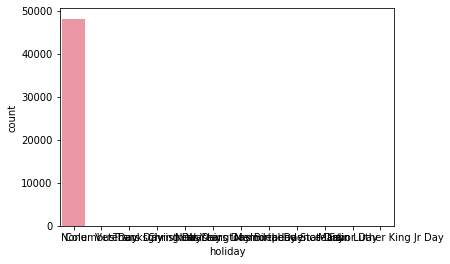

In [16]:
sns.countplot(df_base['holiday'])
qtde = df_base['holiday'].value_counts()
print(qtde)

Esse atributo se mostrar bastante desbalanceado. Sendo assim, ele será removida da base de dados. 
O desbalanceamento já era esperado, pois não acontece muitos feriados em um ano. 

In [17]:
df_base = df_base.drop(columns=['holiday'])
df_base.head()

,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,year,month,day,hour,weekday
0,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,2012,10,2,9,1
1,289.36,0.0,0.0,75,Clouds,broken clouds,4516,2012,10,2,10,1
2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,2012,10,2,11,1
3,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,2012,10,2,12,1
4,291.14,0.0,0.0,75,Clouds,broken clouds,4918,2012,10,2,13,1


### Weather_main e Weather_description

Clouds          15158
Clear           13384
Mist             5949
Rain             5672
Snow             2875
Drizzle          1820
Haze             1360
Thunderstorm     1033
Fog               912
Smoke              20
Squall              4
Name: weather_main, dtype: int64


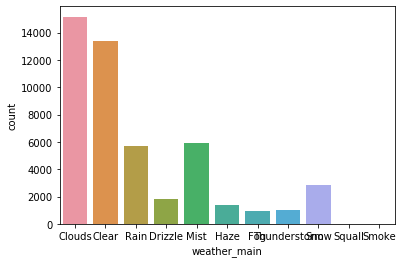

In [18]:
sns.countplot(df_base['weather_main'])
qtde = df_base['weather_main'].value_counts()
print(qtde)

sky is clear                           11659
mist                                    5949
overcast clouds                         5079
broken clouds                           4663
scattered clouds                        3460
light rain                              3372
few clouds                              1956
light snow                              1945
Sky is Clear                            1725
moderate rain                           1664
haze                                    1360
light intensity drizzle                 1099
fog                                      912
proximity thunderstorm                   673
drizzle                                  651
heavy snow                               616
heavy intensity rain                     467
snow                                     293
proximity shower rain                    136
thunderstorm                             124
heavy intensity drizzle                   64
thunderstorm with heavy rain              63
thundersto

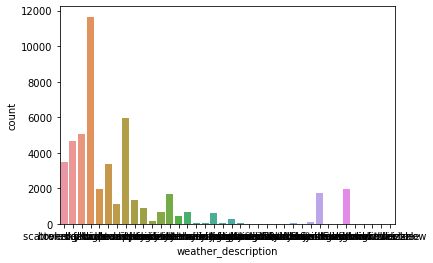

In [140]:
sns.countplot(df_base['weather_description'])
qtde = df_base['weather_description'].value_counts()
print(qtde)

É possível percebe que tanto o **weather_main** quanto o **weather_description** são atributos desbalanceados, principalmente este último. Foi percebido, que esses dois atributos estão ligados entre si. Cada _description_ está ligado a um weather. 

In [19]:
for weather in df_base['weather_main'].unique():
    loc = df_base.loc[df_base['weather_main']== weather]
    print("Descricoes para ", weather, ":", loc['weather_description'].unique())
    
#loc https://medium.com/horadecodar/data-science-tips-02-como-usar-loc-e-iloc-no-pandas-fab58e214d87

Descricoes para  Clouds : ['scattered clouds' 'broken clouds' 'overcast clouds' 'few clouds']
Descricoes para  Clear : ['sky is clear' 'Sky is Clear']
Descricoes para  Rain : ['light rain' 'proximity shower rain' 'moderate rain'
 'heavy intensity rain' 'freezing rain' 'light intensity shower rain'
 'very heavy rain']
Descricoes para  Drizzle : ['light intensity drizzle' 'drizzle' 'heavy intensity drizzle'
 'shower drizzle']
Descricoes para  Mist : ['mist']
Descricoes para  Haze : ['haze']
Descricoes para  Fog : ['fog']
Descricoes para  Thunderstorm : ['proximity thunderstorm' 'thunderstorm with light rain'
 'proximity thunderstorm with rain' 'thunderstorm with heavy rain'
 'thunderstorm with rain' 'proximity thunderstorm with drizzle'
 'thunderstorm' 'thunderstorm with light drizzle'
 'thunderstorm with drizzle']
Descricoes para  Snow : ['heavy snow' 'snow' 'shower snow' 'light rain and snow' 'light snow'
 'light shower snow' 'sleet']
Descricoes para  Squall : ['SQUALLS']
Descricoes pa

Sendo assim, esses dois atributos(**weater_main e weather_description**) serão retirados  da base de dados. 

In [20]:
df_base = df_base.drop(columns=['weather_main'])
df_base = df_base.drop(columns=['weather_description'])
df_base.head()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,year,month,day,hour,weekday
0,288.28,0.0,0.0,40,5545,2012,10,2,9,1
1,289.36,0.0,0.0,75,4516,2012,10,2,10,1
2,289.58,0.0,0.0,90,4767,2012,10,2,11,1
3,290.13,0.0,0.0,90,5026,2012,10,2,12,1
4,291.14,0.0,0.0,75,4918,2012,10,2,13,1


# Correlação

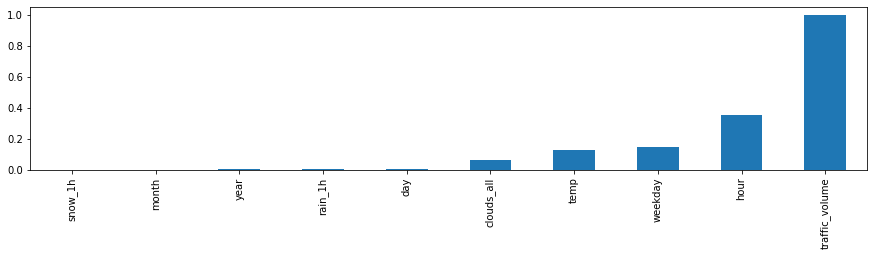

In [21]:
df_base.corr().abs()["traffic_volume"].sort_values().plot.bar(figsize=[15, 3])

Diante do gráfico de correlação, pode-se perceber que os atributos que mais possuem impacto relevante no **traffic_volume**, são: **hour**, **weekday**, **temp** e **clouds_all**

In [22]:
correl = df_base.corr()
correl.style.background_gradient(cmap = 'coolwarm')

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,year,month,day,hour,weekday
temp,1,0.00907029,-0.0197562,-0.101968,0.130161,0.134916,0.223943,0.022677,0.112048,-0.0078244
rain_1h,0.00907029,1,-8.99063e-05,0.00481843,0.00471506,0.000443471,0.00129963,-0.0022933,0.0034222,-0.00692016
snow_1h,-0.0197562,-8.99063e-05,1,0.027934,0.000736274,-0.00351419,0.0204217,0.0157977,0.00985232,-0.0149286
clouds_all,-0.101968,0.00481843,0.027934,1,0.0671382,-0.0728552,-0.00911762,0.0484245,0.0545218,-0.039816
traffic_volume,0.130161,0.00471506,0.000736274,0.0671382,1,0.00469673,-0.00247962,-0.0077597,0.3523,-0.149551
year,0.134916,0.000443471,-0.00351419,-0.0728552,0.00469673,1,-0.15884,0.0120909,-0.00756136,-0.0123961
month,0.223943,0.00129963,0.0204217,-0.00911762,-0.00247962,-0.15884,1,0.0086861,0.0018437,0.0107621
day,0.022677,-0.0022933,0.0157977,0.0484245,-0.0077597,0.0120909,0.0086861,1,-0.00953101,0.00862729
hour,0.112048,0.0034222,0.00985232,0.0545218,0.3523,-0.00756136,0.0018437,-0.00953101,1,-0.00380821
weekday,-0.0078244,-0.00692016,-0.0149286,-0.039816,-0.149551,-0.0123961,0.0107621,0.00862729,-0.00380821,1


E aqui temos a matriz de correlação. Agora podemos vizualizar, numericamente, a correlação entre os atributos. 
Os atributos que possuem correlações desprezíveis, são: **day**, **month**, **year**, **snow_1h**, **rain_1h**. E eles serão removidos da base de dados.

In [23]:
df_base = df_base.drop(columns=['day'])
df_base = df_base.drop(columns=['month'])
df_base = df_base.drop(columns=['year'])
df_base = df_base.drop(columns=['snow_1h'])
df_base = df_base.drop(columns=['rain_1h'])

In [24]:
df_base.head()

,temp,clouds_all,traffic_volume,hour,weekday
0,288.28,40,5545,9,1
1,289.36,75,4516,10,1
2,289.58,90,4767,11,1
3,290.13,90,5026,12,1
4,291.14,75,4918,13,1


# Identificando Outliers

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9d0d5f2e10>]],
      dtype=object)

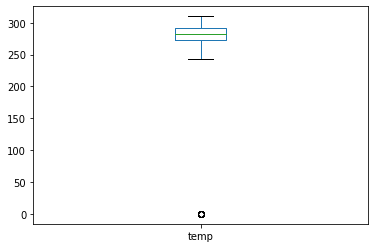

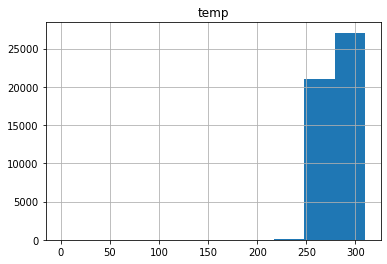

In [25]:
df_base['temp'].plot.box()
df_base.hist(column='temp')

Há alguns outliers em **temp**, provavelmente com valores próximos a _0_. No entanto, não serão tratados agora. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9d0cdcb410>]],
      dtype=object)

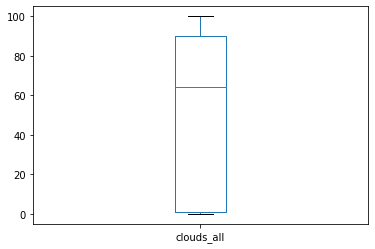

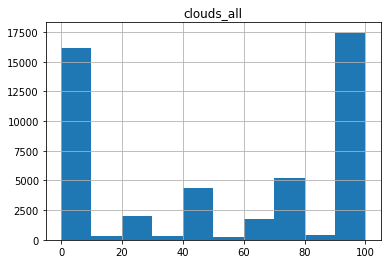

In [26]:
df_base['clouds_all'].plot.box()
df_base.hist(column='clouds_all')


Não há outliers. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9d0c320890>]],
      dtype=object)

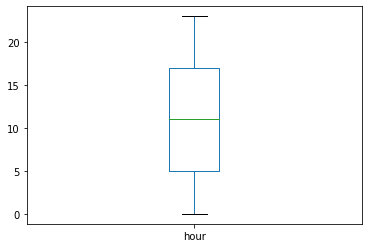

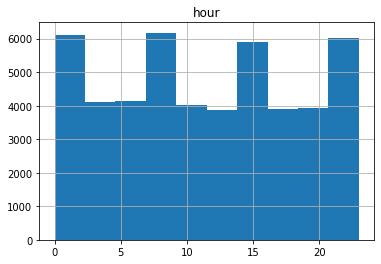

In [27]:
df_base['hour'].plot.box()
df_base.hist(column='hour')

In [ ]:
Não tem outliers

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9d0d3288d0>]],
      dtype=object)

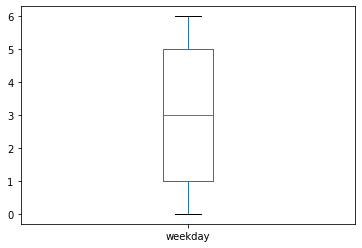

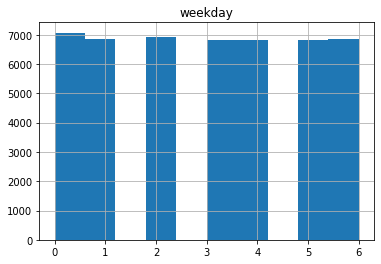

In [28]:
df_base['weekday'].plot.box()
df_base.hist(column='weekday')

Também não há a presença de outliers!

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9d0cd69950>]],
      dtype=object)

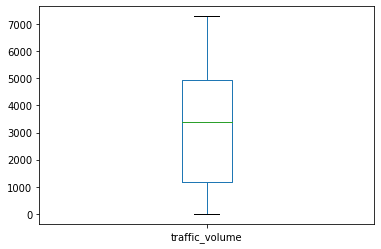

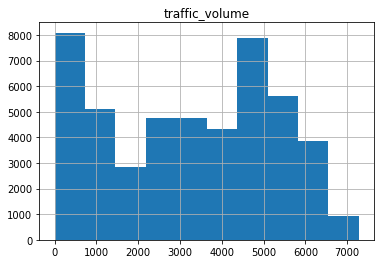

In [29]:
df_base['traffic_volume'].plot.box()
df_base.hist(column='traffic_volume')

Não há outliers em traffic_volume

## Impacto de cada atribuito no Volume de Tráfego

Mesmo já sabendo quais os atributos mais correlacionados a **traffic_volume**.
Será mostrado como esses atributos interferem no volume de tráfego.

### Temp

Text(0, 0.5, 'Tráfego')

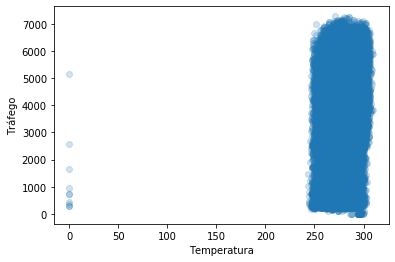

In [30]:
plt.scatter(df_base['temp'],df_base['traffic_volume'],alpha = 0.2)
plt.xlabel('Temperatura')
plt.ylabel('Tráfego')

Quando a temperatura está alta, há um maior volume de tráfego. No entanto, podemos perceber que quando a temperatura está baixa, também há um volume de tráfego, mas não tão grande. Neste caso, são alguns outliers, como já citado anteriormente.

### Clouds_all

Text(0, 0.5, 'Tráfego')

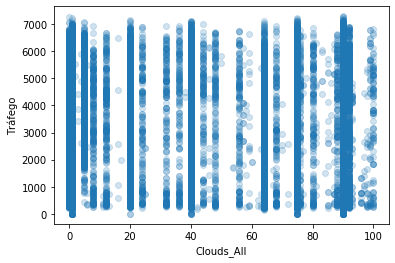

In [31]:
plt.scatter(df_base['clouds_all'],df_base['traffic_volume'],alpha = 0.2)
plt.xlabel('Clouds_All')
plt.ylabel('Tráfego')

Pode-se perceber o tamanho da nuvem mais correlacionados ao volume de tráfego. Há uma distribuição, quase que, uniforme. 

### Hour

Text(0, 0.5, 'Tráfego')

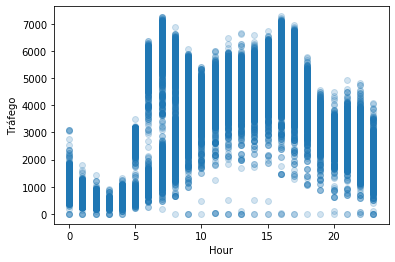

In [32]:
plt.scatter(df_base['hour'],df_base['traffic_volume'],alpha = 0.2)
plt.xlabel('Hour')
plt.ylabel('Tráfego')

Foram identificados que os horários que possuem mais volume de tráfego, foram: **6h, 7h, 8h, 9h, 11h, 12h, 13h, 16h, 17h e 18h**. Então, o volume de tráfego está relacionado aos horários de pico.

### Weekday

Text(0, 0.5, 'Tráfego')

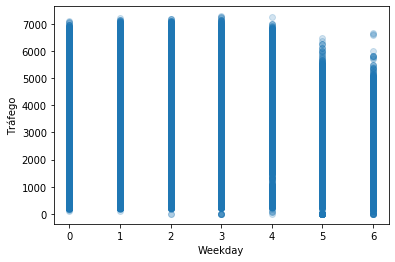

In [33]:
plt.scatter(df_base['weekday'],df_base['traffic_volume'],alpha = 0.2)
plt.xlabel('Weekday')
plt.ylabel('Tráfego')

Pode-se visualizar que há uma distribuição bem uniforme.

# Normalização dos Dados

A  aplicação da normalização dos dados se faz necessário para evitar que alguns atributos predominem sobre outros. E a normalização também trata melhor os outliers, e na base de dados foram encontrados alguns outliers.  

In [34]:
num = df_base.select_dtypes(['float64', 'int64']).columns.values
num = np.delete(num, np.argwhere(num == 'traffic_volume'))

scaler = preprocessing.StandardScaler()
scaled = pd.concat([pd.DataFrame(scaler.fit_transform(df_base[num]), columns = num), df_base['traffic_volume']], axis=1)

scaled.head()

,temp,clouds_all,hour,weekday,traffic_volume
0,0.530416,-0.240049,-0.345481,-0.989478,5545
1,0.611384,0.657047,-0.201395,-0.989478,4516
2,0.627877,1.041516,-0.057309,-0.989478,4767
3,0.669111,1.041516,0.086777,-0.989478,5026
4,0.744831,0.657047,0.230863,-0.989478,4918


# Divisão da Base de Dados - 70/30

In [35]:
trainSample,testSample = model_selection.train_test_split(scaled.copy(), random_state = 42, test_size = 0.3, shuffle = True)
    
trainSample2,testSample2 = model_selection.train_test_split(scaled.copy(), random_state = 43,test_size = 0.3, shuffle = True)

trainTarget = trainSample['traffic_volume'].copy()
testTarget = testSample['traffic_volume'].copy()

trainTarget2 = trainSample2['traffic_volume'].copy()
testTarget2 = testSample2['traffic_volume'].copy()

del trainSample['traffic_volume']
del testSample['traffic_volume']
del trainSample2['traffic_volume']
del testSample2['traffic_volume']



A base de dados foi divida em 70/30, isto é, 70% para o treinamento e 30% para os testes. Como requerido, o experimento será realizado
duas vezes. Por isso, o conjunto de treinamento e teste possuem duas amostras cada.


# Aplicação do KNN

O algoritmo de aprendizagem de máquina escolhido é o k-Nearest Neighbors(KNN) para regressão. Com o valor de **k=3**. 

In [43]:
knn = neighbors.KNeighborsRegressor(n_neighbors=3)

knn.fit(trainSample,trainTarget)
result_firstKNN = knn.predict(testSample)
result_trainKNN = knn.predict(trainSample) #predição do como os dados do treino


knn.fit(trainSample2,trainTarget2)
result_secondKNN = knn.predict(testSample2)
result_tKNN = knn.predict(trainSample2)#predição do como os dados do treino

O modelo será avaliados por meio de métricas. As métricas, neste caso, serão: Mean Squared Error (**MSE**), Mean Absolute Error (**MAE**) e Coefficient of Determination (*$R^2$*). Para as duas primeiras métricas de avaliação, valores próximos a 0 indicam que o modelo possui poucos erros. Já em relação a última métrica, valores próximos a 1 indicam que o modelo se ajusta muito bem aos dados.

In [46]:
print("Primeiro conjunto de teste KNN com k=3")

print("MSE = %0.5f" % (metrics.mean_squared_error(testTarget,result_firstKNN)))
print("MAE = %0.5f" % (metrics.mean_absolute_error(testTarget,result_firstKNN)))
print("R² = %0.5f - teste" % (metrics.r2_score(testTarget,result_firstKNN)))
print("R² = %0.5f - treino" % (metrics.r2_score(trainTarget,result_trainKNN)))

print("\n\nSegundo conjunto de teste KNN com k=3")
print("MSE = %0.5f" % (metrics.mean_squared_error(testTarget2,result_secondKNN)))
print("MAE = %0.5f" % (metrics.mean_absolute_error(testTarget2,result_secondKNN)))
print("R² = %0.5f - teste" % (metrics.r2_score(testTarget2,result_secondKNN)))
print("R² = %0.5f - treino" % (metrics.r2_score(trainTarget2,result_tKNN)))

Primeiro conjunto de teste KNN com k=3
MSE = 298296.99829
MAE = 325.59173
R² = 0.92548 - teste
R² = 0.96225 - treino


Segundo conjunto de teste KNN com k=3
MSE = 315061.31221
MAE = 330.16232
R² = 0.91993 - teste
R² = 0.96386 - treino


Nas duas execuções do algortimo os valores de coeficiente de determinação obtido foi superior a 0.9  A partir dos resultados em (*$R^2$*), é possível perceber que nas duas execuções de teste, os valores foram superiores a 0.9. 
Realizando avaliação e comparação, somente, da métrica do Coefficient of Determination (*$R^2$*), é possível perceber que não acontece um overfitting. POis quando o conjunto de teste foi executado, eĺe apresentou valores diferentes da execução do conjunto de treino.

### Gráfico KNN

In [58]:
def scatter(x, y,title = None):
    fig, ax = plt.subplots()
    ax.scatter(x, y, c='blue',alpha = 0.3)
    line = mlines.Line2D([0, 1], [0, 1], color='black')
    transform = ax.transAxes
    line.set_transform(transform)
    ax.add_line(line)
    plt.xlabel("Previsto")
    plt.ylabel("Verdadeiro")
    if title != None:
        plt.title(title)
    plt.show()
    
   

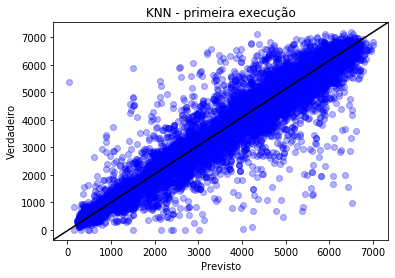

In [59]:
scatter(result_firstKNN,testTarget, "KNN - primeira execução") #primeira execução

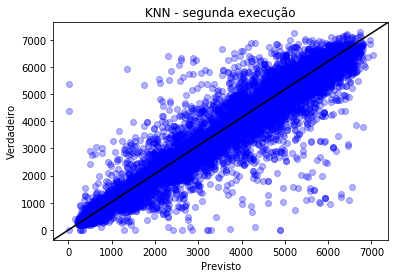

In [60]:
scatter(result_secondKNN,testTarget2, "KNN - segunda execução") #segunda execução

A execução do KNN nas duas amostras apresentaram saídas bem parecidas. A partir das métricas, é possível perceber que o algoritmo conseguiu prever bem a saída desejada na maioria dos casos. No entanto, quando se faz a plotagem do gráfico, é possível visualizar que o algoritmo falhou em alguns casos. Uma hipótese, é inferir que o atributo **holiday**, mesmo totalmente desbalanceado, deva ter feito uma diferença, já que é esperado que nos dias de feriado o volume de passageiro no metrô diminua. 

# Aplicação da Árvore de Decisão

O outro algoritmo a ser utilizado será a Árvore de Decisão para regressão. Da mesma forma que foi feito no KNN, aqui as amostras, de treino e teste, serão executadas duas vezes também.

In [53]:
tdt = tree.DecisionTreeRegressor()

tdt.fit(trainSample, trainTarget)
result_firstTree = tdt.predict(testSample)
result_trainTree = knn.predict(trainSample) #predição do como os dados do treino

tdt.fit(trainSample2, trainTarget2)
result_secondTree = tdt.predict(testSample2)
result_tTree = knn.predict(trainSample2)#predição do como os dados do treino

In [67]:
print("Primeiro conjunto de teste - Árvore de Decisão")

print("MSE = %0.5f" % (metrics.mean_squared_error(testTarget,result_firstTree)))
print("MAE = %0.5f" % (metrics.mean_absolute_error(testTarget,result_firstTree)))
print("R² = %0.5f - teste" % (metrics.r2_score(testTarget,result_firstTree)))
print("R² = %0.5f - treino" % (metrics.r2_score(trainTarget,result_trainTree)))

print("\n\nSegundo conjunto de teste - Árvore de Decisão")
print("MSE = %0.5f" % (metrics.mean_squared_error(testTarget2,result_secondTree)))
print("MAE = %0.5f" % (metrics.mean_absolute_error(testTarget2,result_secondTree)))
print("R² = %0.5f - teste" % (metrics.r2_score(testTarget2,result_secondTree)))
print("R² = %0.5f - treino" % (metrics.r2_score(trainTarget2,result_tTree)))


Primeiro conjunto de teste - Árvore de Decisão
MSE = 360033.43370
MAE = 302.47268
R² = 0.91006 - teste
R² = 0.94930 - treino


Segundo conjunto de teste - Árvore de Decisão
MSE = 361600.77505
MAE = 302.77080
R² = 0.90811 - teste
R² = 0.96386 - treino


O algoritmo de Árvore de Decisão foi avaliado da mesma forma que o algoritmo KNN. 

O algoritmo de Árvore de Decisão obteve resultados parecidos nas duas amostras testadas. Aqui também não acontece overfitting, devido a diferença de valores do R² tanto quanto aos valores de treino quanto aos valores de teste. 

### Gráfico da Árvore de Decisão

In [64]:
def scatter(x, y,title=None):
    fig, ax = plt.subplots()
    ax.scatter(x, y, c='blue',alpha = 0.3)
    line = mlines.Line2D([0, 1], [0, 1], color='black')
    transform = ax.transAxes
    line.set_transform(transform)
    ax.add_line(line)
    plt.xlabel("Previsto")
    plt.ylabel("Verdadeiro")
    if title != None:
        plt.title(title)
    plt.show()

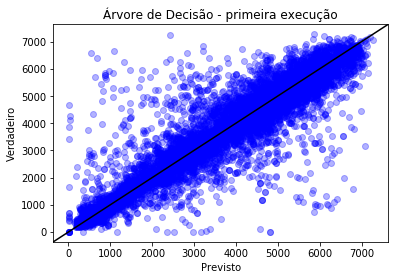

In [65]:
scatter(result_secondTree,testTarget2, "Árvore de Decisão - primeira execução") #primeira execução

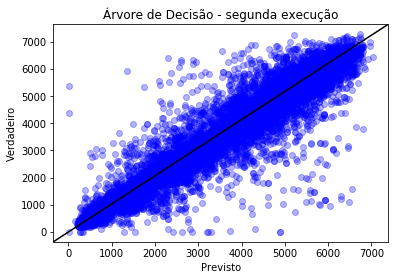

In [66]:
scatter(result_secondKNN,testTarget2, "Árvore de Decisão - segunda execução") #segunda execução

A plotagem do gráfico de Árvore de Decisão mostra que o algortimo errou predição de algumas saída.  


Quanto as métricas, comparando os dois algoritmos, o **MAE** apresentou um melhor resultado em Árvore de Decisão. Já o **MSE e R²** apresentaram um melhor resultado no KNN.





# Validação Cruzada

In [68]:
kf = model_selection.KFold(n_splits=10,random_state=42, shuffle=True)

knn = neighbors.KNeighborsRegressor(n_neighbors=3)
tee = tree.DecisionTreeRegressor()

pred_x = scaled.copy()
pred_y = pred_x['traffic_volume']

del pred_x['traffic_volume']

for train_index, test_index in kf.split(scaled):
    x_train, x_test = pred_x.loc[train_index], pred_x.loc[test_index]
    y_train, y_test = pred_y.loc[train_index], pred_y.loc[test_index]

    knn.fit(x_train,y_train)
    resultknn = knn.predict(x_test)
    
    tee.fit(x_train,y_train)
    resulttree = tee.predict(x_test)

print("Validação Cruzada - KNN")
print("MSE = %0.5f" % (metrics.mean_squared_error(y_test,resultknn)))
print("MAE = %0.5f" % (metrics.mean_absolute_error(y_test,resultknn)))
print("R² = %0.5f" % (metrics.r2_score(y_test,resultknn)))

    
print("\nValidação Cruzada - Árvore de Decisão")
print("MSE = %0.5f" % (metrics.mean_squared_error(y_test,resulttree)))
print("MAE = %0.5f" % (metrics.mean_absolute_error(y_test,resulttree)))
print("R² = %0.5f" % (metrics.r2_score(y_test,resulttree)))
        


Validação Cruzada - KNN
MSE = 311770.32427
MAE = 323.03148
R² = 0.92083

Validação Cruzada - Árvore de Decisão
MSE = 376308.27672
MAE = 299.42432
R² = 0.90444


Mesmo realizando a validação cruzada, os resultados das métricas se mostraram similares aos resultados obtidos nos dois algoritmos executados anteriormente. Novamente o algoritmo KNN se mostra melhor que de Árvore de Decisão. Podemos concluir que os modelos utilizados não aparentam ter overfitting. Pois os modelos se adaptaram as diferentes amostras utilizadas. Conclui- se que mesmo realizando a validação cruzada, os resultados obtidos foram bastante semelhantes aos resultados até então conhecidos. 